In [31]:
from os import path
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import json


In [ ]:
city_name = "Wroclaw"
results_dir = path.join("data", "geotiles")
city_dir = path.join(results_dir, city_name)
gdf = gpd.read_file(path.join(city_dir, "tag_geometry.geojson"))

with open(path.join(city_dir, "geo_stats.json"), "r") as geo_file:
    geo_stats = json.load(geo_file)
with open(path.join(city_dir, "tag_stats.json"), "r") as tag_file:
    tag_stats = json.load(tag_file)

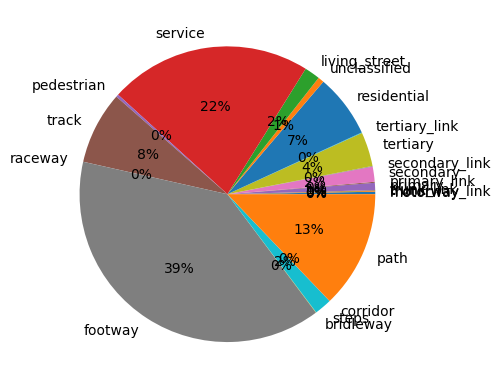

In [32]:
tag_totals = [(tag,tag_stats[tag]['total']) for tag in tag_stats if tag_stats[tag]['total'] > 0]
tags, totals = list(map(list, zip(*tag_totals)))
plt.pie(totals, labels=tags, autopct='%.0f%%')
plt.show() 

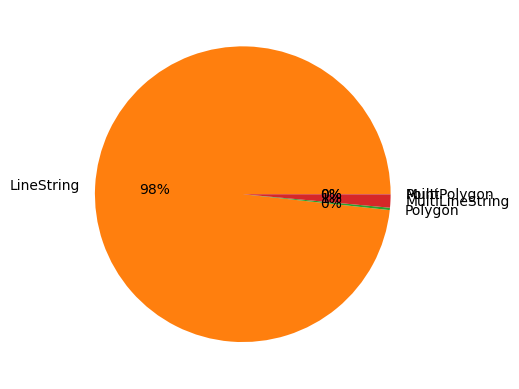

In [33]:
geo_totals = [(geo,geo_stats[geo]['total']) for geo in geo_stats if geo_stats[geo]['total'] > 0]
geos, totals = list(map(list, zip(*geo_totals)))
plt.pie(totals, labels=geos, autopct='%.0f%%')
plt.show() 

In [34]:
geo_totals

[('Point', 3),
 ('LineString', 198722),
 ('Polygon', 520),
 ('MultiLineString', 2930),
 ('MultiPolygon', 22)]

In [43]:
list(tag_stats['motorway'].keys())[1:]

['total',
 'Point',
 'LineString',
 'LinearRing',
 'Polygon',
 'MultiPoint',
 'MultiLineString',
 'MultiPolygon',
 'GeometryCollection']

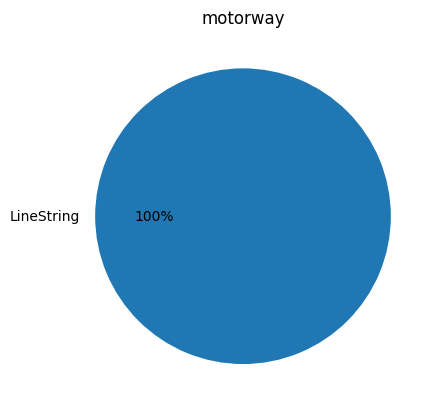

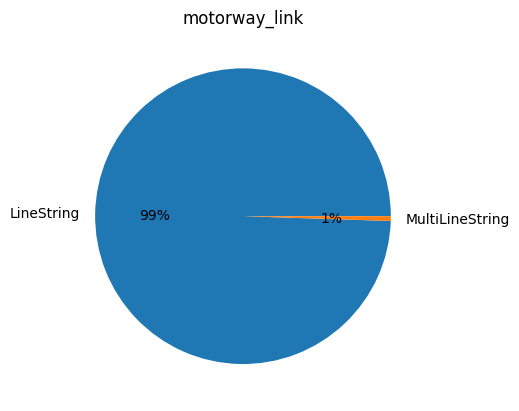

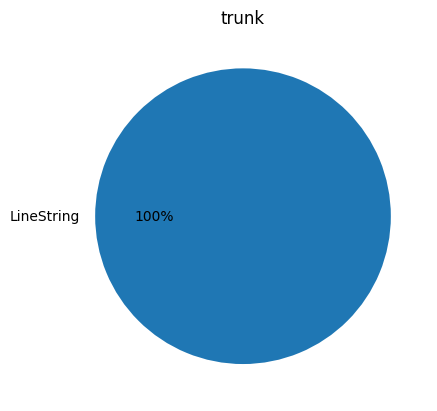

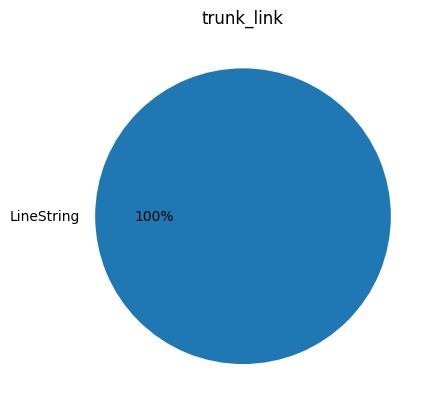

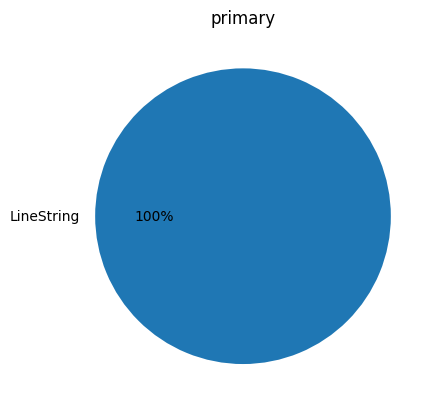

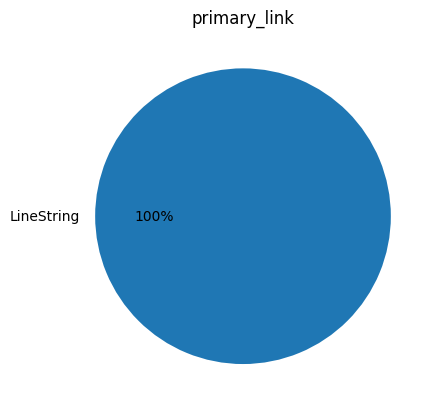

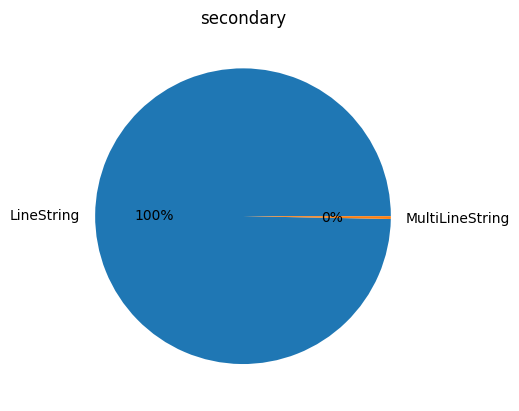

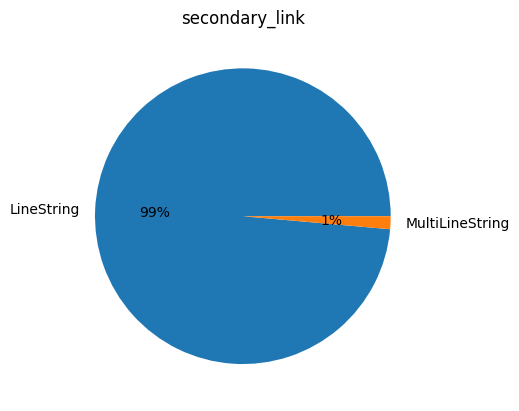

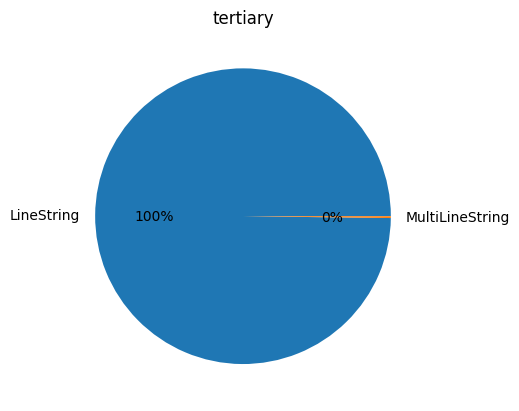

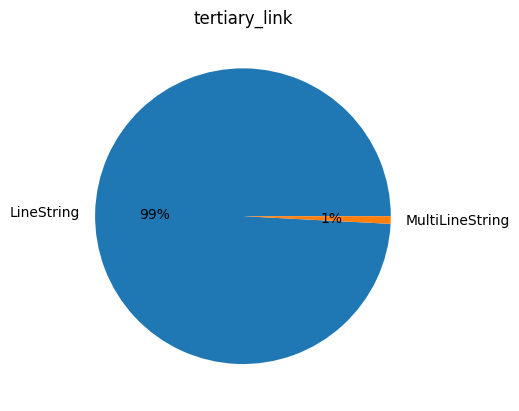

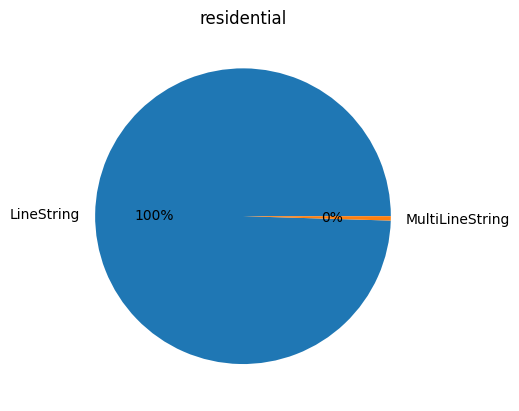

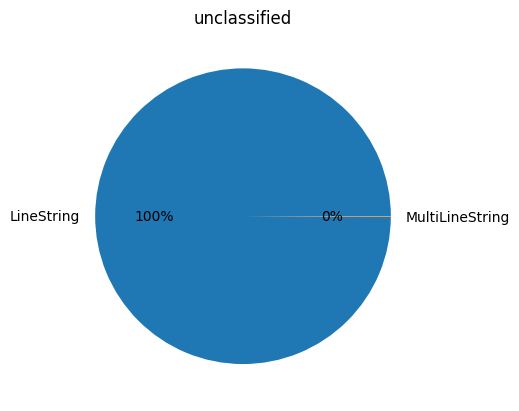

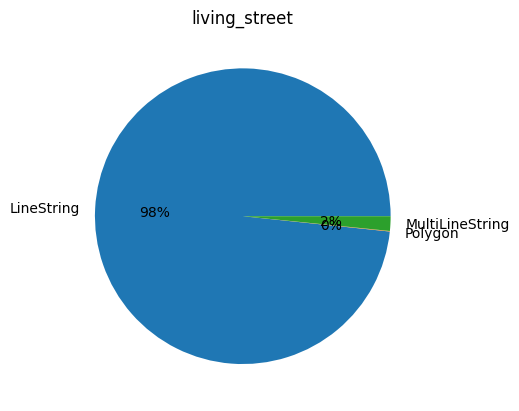

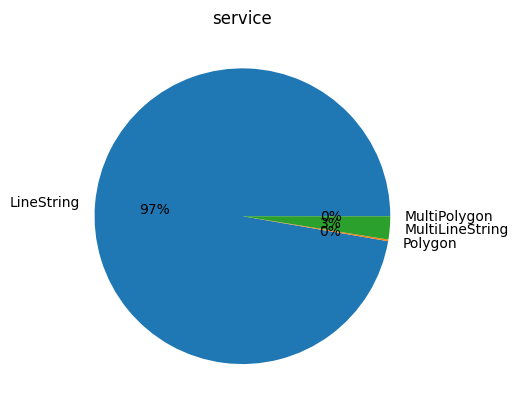

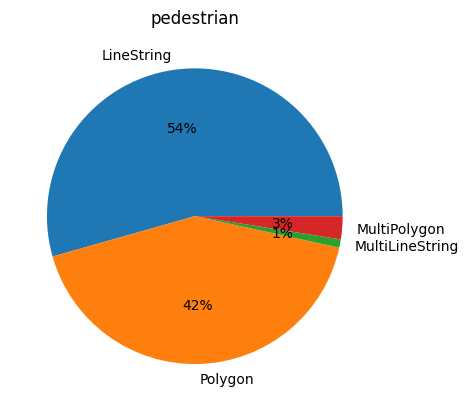

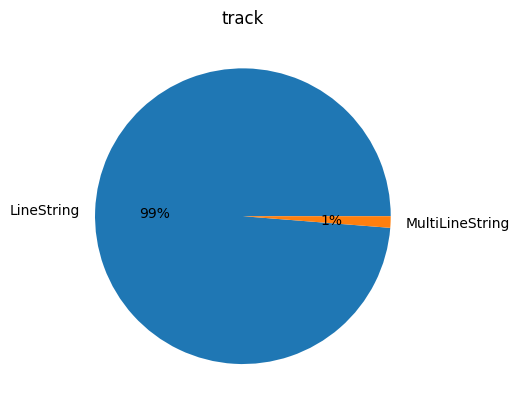

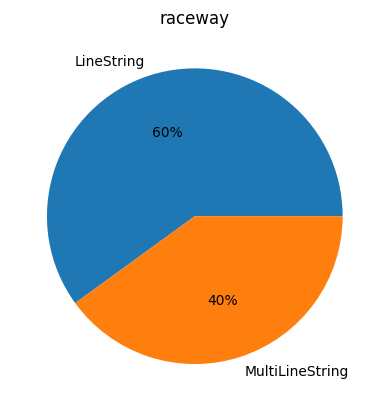

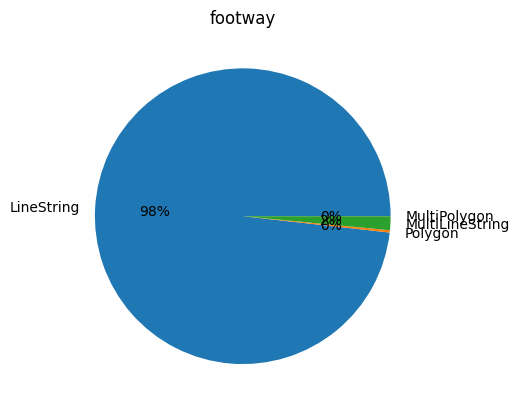

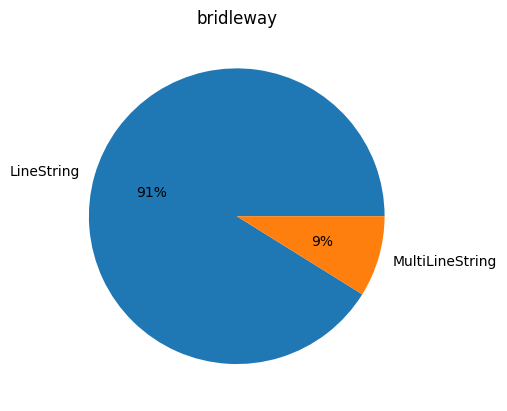

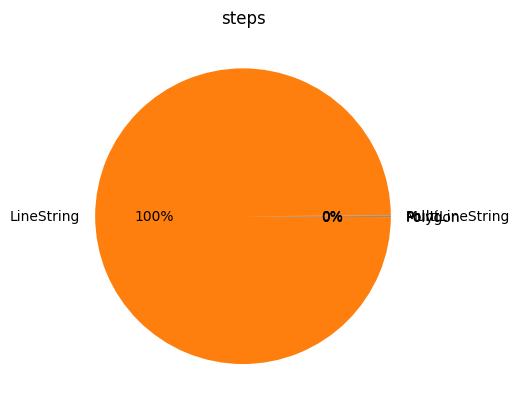

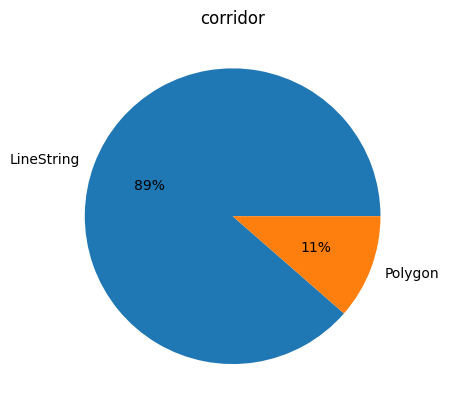

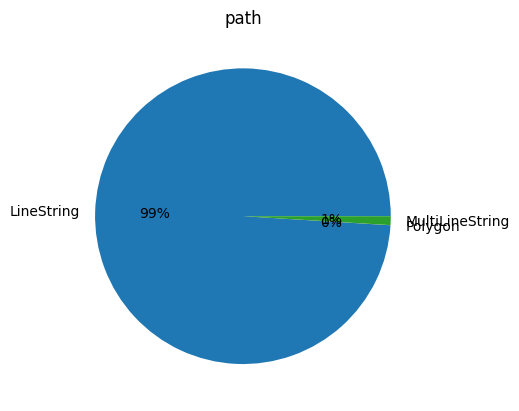

In [48]:
for tag in tag_stats:
    if(tag_stats[tag]['total']==0):
        continue
    geo_totals = [(geo,tag_stats[tag][geo]) for geo in tag_stats[tag] if tag_stats[tag][geo] > 0 and geo != 'total']
    geos, stats = list(map(list, zip(*geo_totals)))
    plt.pie(stats, labels=geos, autopct='%.0f%%')
    plt.title(tag)
    plt.show() 

In [52]:
geo = 'Polygon'
tag_totals = [(tag,geo_stats[geo][tag]) for tag in geo_stats[geo] if geo_stats[geo][tag] > 0 and tag != 'total']
tag_totals

[('living_street', 2),
 ('service', 79),
 ('pedestrian', 235),
 ('footway', 195),
 ('steps', 2),
 ('corridor', 4),
 ('path', 3)]

In [53]:
geo = 'MultiPolygon'
tag_totals = [(tag,geo_stats[geo][tag]) for tag in geo_stats[geo] if geo_stats[geo][tag] > 0 and tag != 'total']
tag_totals

[('service', 2), ('pedestrian', 14), ('footway', 6)]

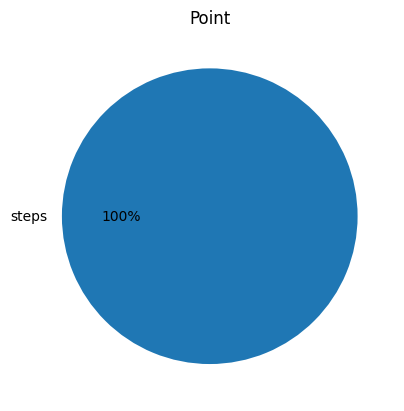

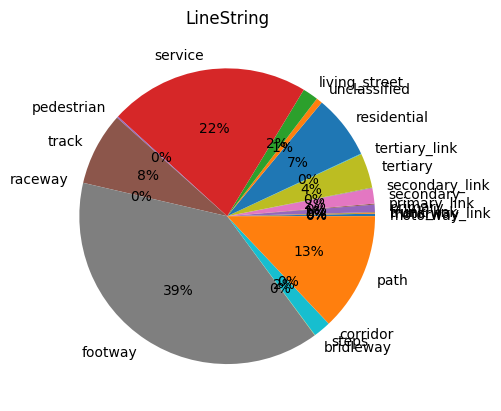

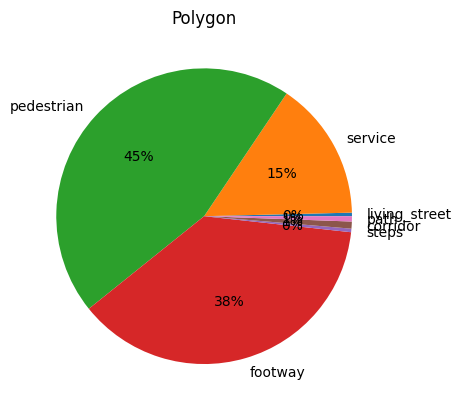

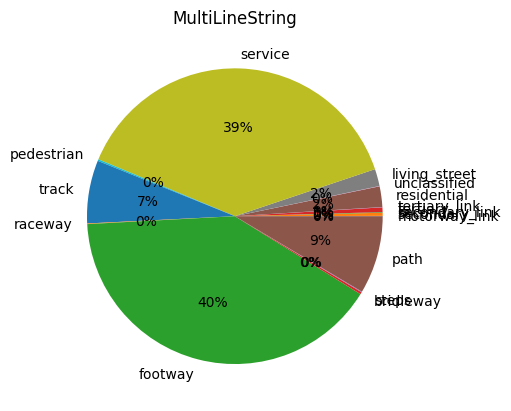

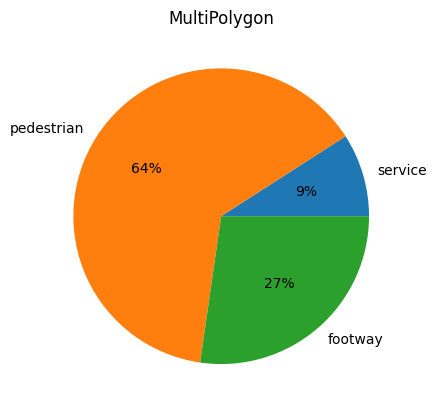

In [54]:
for geo in geo_stats:
    if(geo_stats[geo]['total']==0):
        continue
    tag_totals = [(tag,geo_stats[geo][tag]) for tag in geo_stats[geo] if geo_stats[geo][tag] > 0 and tag != 'total']
    tags, stats = list(map(list, zip(*tag_totals)))
    plt.pie(stats, labels=tags, autopct='%.0f%%')
    plt.title(geo)
    plt.show() 

<Axes: xlabel='neighbourCount', ylabel='Count'>

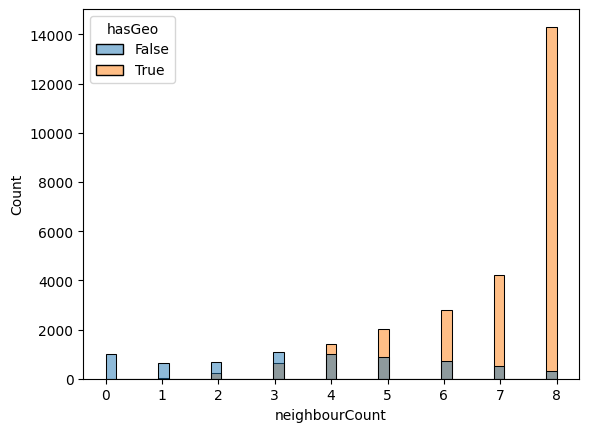

In [62]:
sns.histplot(data=gdf, x="neighbourCount", hue="hasGeo")